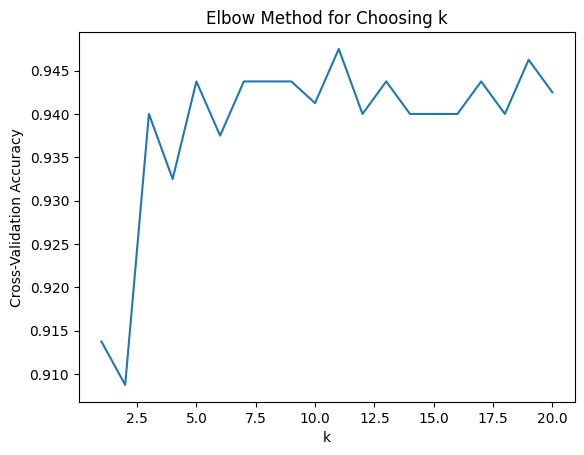

Distances Vectorized: [ 0.         18.28793804 17.22956882 17.60655843 12.80917524  7.90808779
 10.4611081  12.33391814 15.93217112 20.92193718 18.28839749 15.67510009
 17.26465421 23.42826445 14.13330298 14.05226374 18.89364621 12.509633
 25.55791041 15.4340609  15.4943574  17.64445147 18.52950836 16.82152741
 26.07017348 23.27856237 17.57454223 19.48282199 14.84186484 15.27642483
 18.69057928 18.83846991 10.08927999 17.68312133 15.58177034 19.56383133
 18.80602885 11.51749141 23.01920016 21.5822394  16.02302036 15.03195525
 13.95645105 16.30694345 16.13149112 11.33349604 12.29073082 18.88020174
 17.11002218 27.69285957 17.14429809 18.37402163 17.22475543 13.87992084
 12.10841452 13.25923618 18.52049057 17.81031783 18.19513499 16.63776275
 17.23608749 15.07021155 22.60861407 11.41797226  8.05443528 20.23829482
 28.71337052 19.75156634 14.56851193 26.00053704 16.60940549 19.64512832
 15.31972738 19.32622125 21.18131661 21.41859957  8.07908893 21.0145425
 13.85413937 21.08110396  9.9125

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from sklearn.neighbors import KDTree

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Example of vectorized distance calculation
def euclidean_distance_np(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def parallel_distance_calculation(samples, target_sample):
    return Parallel(n_jobs=-1)(delayed(euclidean_distance_np)(x, target_sample) for x in samples)

# Vectorized distance calculations for a set of samples
distances_vectorized = np.sqrt(np.sum((X - X[0]) ** 2, axis=1))

# Parallel distance calculations
distances_parallel = parallel_distance_calculation(X, X[0])

# Example of choosing the best k using cross-validation
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]

# Example of using the elbow method to choose k
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Elbow Method for Choosing k')
plt.show()

# Example of weighted kNN using scikit-learn
weighted_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
weighted_knn.fit(X_train, y_train)
accuracy_weighted_knn = weighted_knn.score(X_test, y_test)

# Example of feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example of using KD-Tree with scikit-learn
kdtree = KDTree(X_train)
distances_kdtree, indices_kdtree = kdtree.query(X_test, k=best_k)

print("Distances Vectorized:", distances_vectorized)
print("Distances Parallel:", distances_parallel)
print("Best k:", best_k)
print("Accuracy of Weighted kNN:", accuracy_weighted_knn)
print("Distances using KD-Tree:", distances_kdtree)
